# 第5回課題
第5回課題では，以下の項目を満たすように分析してください．

明確な解答は用意していませんが，少なくとも間違っていないと言える推論をするようにしてください．

- データの取得
- データの確認
 - 特徴量の確認
 - ラベルの確認
- 仮説を立てる
- データの分析
- モデルの訓練
- 予測
- 精度の確認
- 仮説の確認

# データの取得
wine data 以外を利用してデータ分析してください．

なるべく，ラベルと属性から推論が立てやすいデータを選択するとやりやすいです．

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
data_diabetes = load_diabetes()

In [2]:
X_all = pd.DataFrame(data_diabetes.data, columns=("age", "sex", "bmi", "map", "tc", "ldl", "hdl", "tch", "ltg", "glu"))

In [3]:
X_all.describe()

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


In [4]:
#一年後の病気進行のデータ"target"
y_all = pd.DataFrame(data_diabetes.target, columns=["target"])
y_all.describe()

,target
count,442.000000
mean,152.133484
std,77.093005
min,25.000000
25%,87.000000
50%,140.500000
75%,211.500000
max,346.000000


# データの確認
データ分析以前にわかることを確認．特徴量の属性やドメイン知識など
- 特徴量の確認
- ラベルの確認

In [5]:
X_all.keys()

Index(['age', 'sex', 'bmi', 'map', 'tc', 'ldl', 'hdl', 'tch', 'ltg', 'glu'], dtype='object')

In [6]:
# 'age'=年齢, 
# 'sex'=性別, 
# 'bmi'＝BMI, 
# 'bp'=map=平均動脈圧, 

# 【s1~s6までは血清データ】
# 's1=tc=総コレステロール（mg / dL）', 
# 's2=ldl=低密度リポタンパク質', 
# 's3=hdl=高密度リポタンパク質', 
# 's4=tch=血清測定', 
# 's5=ltg=血清測定', 
# 's6=glu='

# 仮説を立てる
データについて，導きたい仮説と結論を整理してください．

・おそらくBMIは身長と体重のバランスのため
<br>
→体重が重い人ほど、病気の進行スピードが早い可能性があると仮説できる
<br>
.また何らかの血清データも病気の進行に関係している可能性がある

# データの分析

<AxesSubplot:>

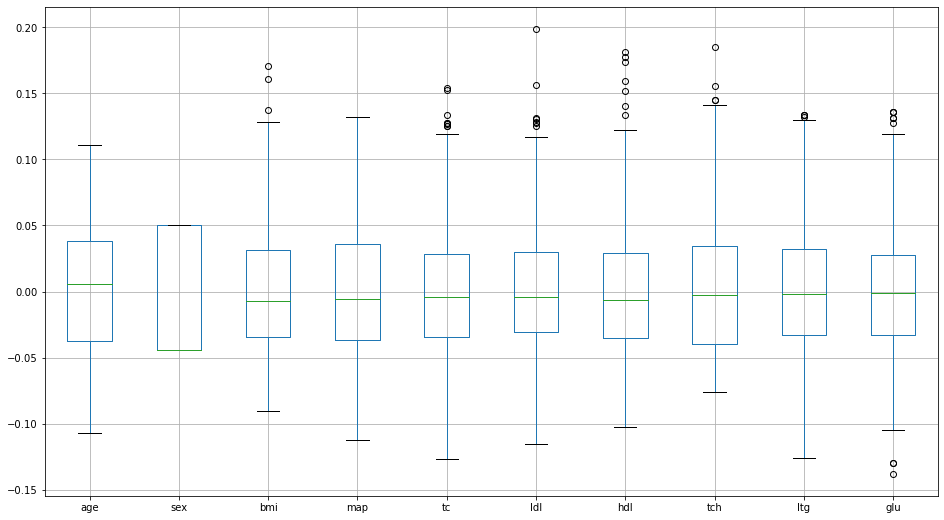

In [9]:
#正規化後
X_all.boxplot(figsize=(16,9))

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=44)

In [12]:
train = pd.concat([X_train,y_train],axis=1,sort=False)

In [13]:
#相関係数の創出
train.corr()

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu,target
age,1.000000,0.232927,0.216146,0.340377,0.287460,0.231284,-0.080549,0.245478,0.320945,0.327012,0.193348
sex,0.232927,1.000000,0.129951,0.284224,0.024270,0.123587,-0.367239,0.309963,0.161479,0.231568,0.078783
bmi,0.216146,0.129951,1.000000,0.390064,0.226958,0.263253,-0.400130,0.452700,0.434008,0.419036,0.579814
map,0.340377,0.284224,0.390064,1.000000,0.239531,0.172689,-0.167509,0.270738,0.413176,0.421568,0.429906
tc,0.287460,0.024270,0.226958,0.239531,1.000000,0.892244,0.079534,0.521839,0.509239,0.335194,0.198081
ldl,0.231284,0.123587,0.263253,0.172689,0.892244,1.000000,-0.181769,0.648229,0.318129,0.303553,0.171462
hdl,-0.080549,-0.367239,-0.400130,-0.167509,0.079534,-0.181769,1.000000,-0.739600,-0.394526,-0.302913,-0.408786
tch,0.245478,0.309963,0.452700,0.270738,0.521839,0.648229,-0.739600,1.000000,0.624302,0.453658,0.459906
ltg,0.320945,0.161479,0.434008,0.413176,0.509239,0.318129,-0.394526,0.624302,1.000000,0.496546,0.562748
glu,0.327012,0.231568,0.419036,0.421568,0.335194,0.303553,-0.302913,0.453658,0.496546,1.000000,0.413182


<AxesSubplot:>

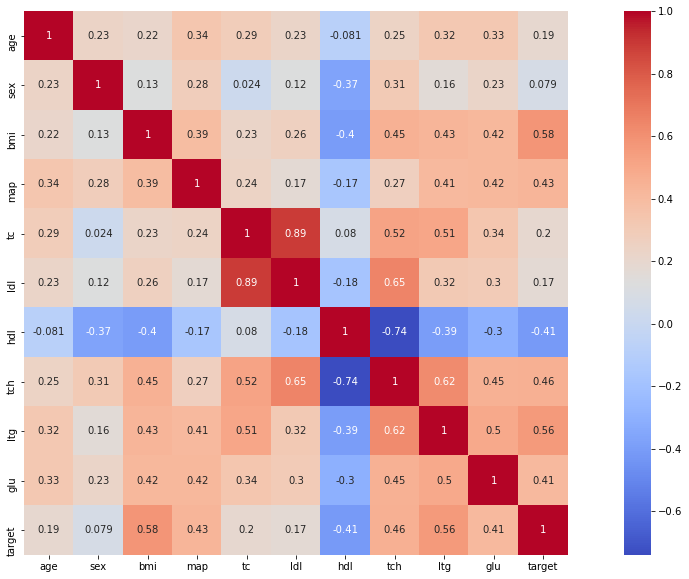

In [14]:
#ヒートマップでの表現
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)
sns.heatmap(train.corr(),  annot=True,square=True,  cmap='coolwarm')

上記マップを確認すると、"BMI:0.58"と"ltg:0.56"において正の相関が見られる

<AxesSubplot:xlabel='bmi', ylabel='target'>

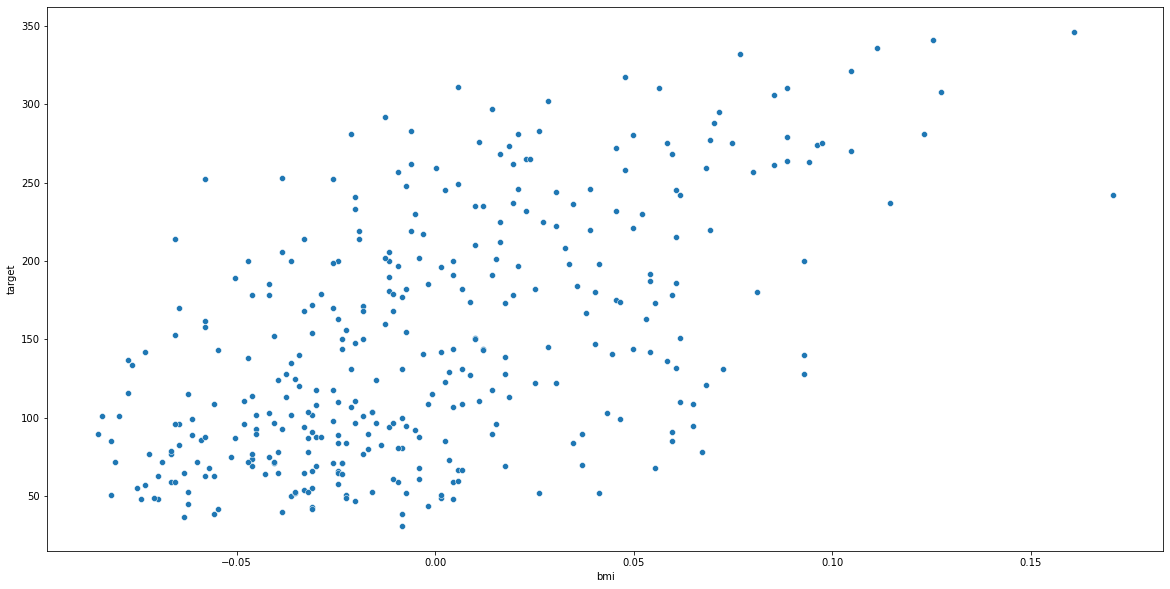

In [15]:
#bmiとtargetを見た場合のデータの散布図
sns.scatterplot( x='bmi', y="target", data=train)

<AxesSubplot:xlabel='ltg', ylabel='target'>

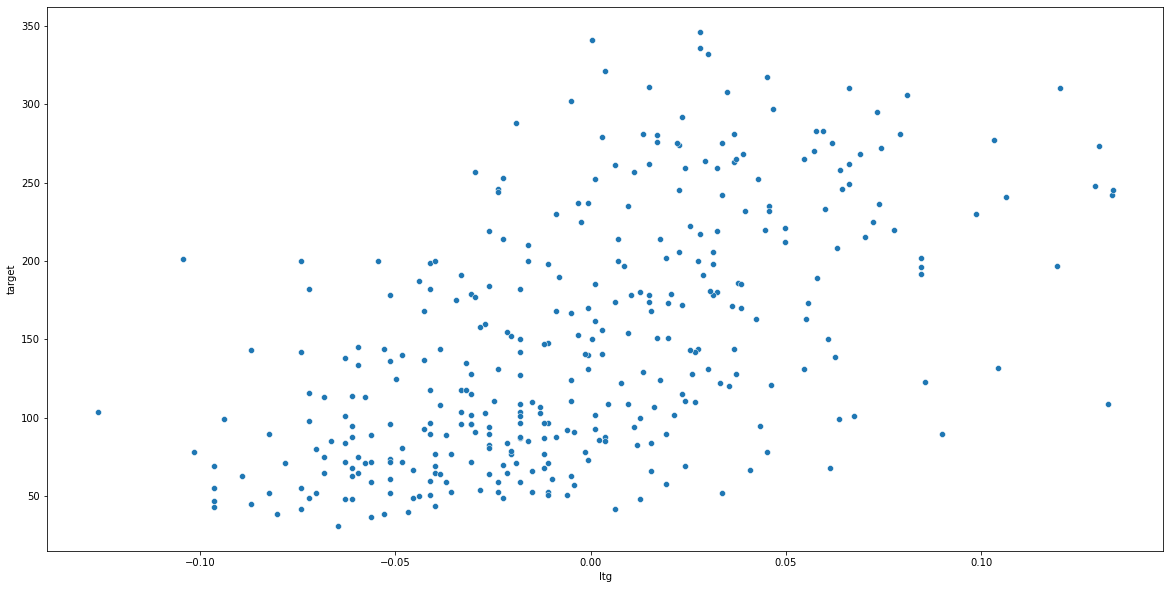

In [16]:
#ltgとtargetを見た場合のデータの散布図
sns.scatterplot( x='ltg', y="target", data=train)

それぞれ相関がありそうな雰囲気を感じる・・・

# モデルの訓練
データは分割するようにしてください．交叉検証についてはまだ説明したいので自由にしてください．

また，モデルの訓練およびデータ分割時に乱数の指定がないなど再現性がなさそうなコードは認めないことにします．

モデルは自由ですが，sklearn を想定しています．自作ライブラリも可ですが，自作の場合，該当箇所は適当に読みます．

<h2>【データの分割】</h2>
ここでは、学習用と評価用のデータを4:1に分ける

In [17]:
#既に相関係数の提示で計算済み

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=44)

In [18]:
train = pd.concat([X_train,y_train],axis=1,sort=False)

In [19]:
train.corr()

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu,target
age,1.000000,0.232927,0.216146,0.340377,0.287460,0.231284,-0.080549,0.245478,0.320945,0.327012,0.193348
sex,0.232927,1.000000,0.129951,0.284224,0.024270,0.123587,-0.367239,0.309963,0.161479,0.231568,0.078783
bmi,0.216146,0.129951,1.000000,0.390064,0.226958,0.263253,-0.400130,0.452700,0.434008,0.419036,0.579814
map,0.340377,0.284224,0.390064,1.000000,0.239531,0.172689,-0.167509,0.270738,0.413176,0.421568,0.429906
tc,0.287460,0.024270,0.226958,0.239531,1.000000,0.892244,0.079534,0.521839,0.509239,0.335194,0.198081
ldl,0.231284,0.123587,0.263253,0.172689,0.892244,1.000000,-0.181769,0.648229,0.318129,0.303553,0.171462
hdl,-0.080549,-0.367239,-0.400130,-0.167509,0.079534,-0.181769,1.000000,-0.739600,-0.394526,-0.302913,-0.408786
tch,0.245478,0.309963,0.452700,0.270738,0.521839,0.648229,-0.739600,1.000000,0.624302,0.453658,0.459906
ltg,0.320945,0.161479,0.434008,0.413176,0.509239,0.318129,-0.394526,0.624302,1.000000,0.496546,0.562748
glu,0.327012,0.231568,0.419036,0.421568,0.335194,0.303553,-0.302913,0.453658,0.496546,1.000000,0.413182


In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 353 entries, 205 to 276
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     353 non-null    float64
 1   sex     353 non-null    float64
 2   bmi     353 non-null    float64
 3   map     353 non-null    float64
 4   tc      353 non-null    float64
 5   ldl     353 non-null    float64
 6   hdl     353 non-null    float64
 7   tch     353 non-null    float64
 8   ltg     353 non-null    float64
 9   glu     353 non-null    float64
 10  target  353 non-null    float64
dtypes: float64(11)
memory usage: 33.1 KB


# 予測

機械学習モデルとしてランダムフォレストを利用

In [21]:
from sklearn.ensemble import  RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [24]:
param_grid = {"max_depth":[1,2,3,5,7], "n_estimators":[100,200,500],"min_samples_split":[2,3, 5,7] }

reg_rf = GridSearchCV(estimator=RandomForestRegressor(random_state=0),
                 param_grid = param_grid,   
                 scoring="r2",  
                 cv = 10,              
                 n_jobs = -1)          

reg_rf.fit(X_train,y_train["target"].values)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 5, 7],
                         'min_samples_split': [2, 3, 5, 7],
                         'n_estimators': [100, 200, 500]},
             scoring='r2')

In [25]:
#決定係数:ランダムフォレスト時
print(reg_rf.best_score_)

0.40224585446643457


<h2>機械学習モデル"ElasticNet"を利用</h2>

In [26]:
#ハイパラ探索
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

In [27]:
param_grid = {'alpha': [0.00001, 0.0001, 0.001,0.01, 0.01, 0.1],'l1_ratio': [0, 0.25, 0.5, 0.75, 1]}

reg_en = GridSearchCV(estimator=ElasticNet(),
                 param_grid = param_grid,   
                 scoring="r2",  
                 cv = 5,              
                 n_jobs = -1)          

reg_en.fit(X_train,y_train["target"].values)

GridSearchCV(cv=5, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.01, 0.1],
                         'l1_ratio': [0, 0.25, 0.5, 0.75, 1]},
             scoring='r2')

In [28]:
print("Score: ",reg_en.best_score_)
#ランダムフォレストより少し改善

print("Params: ",reg_en.best_params_)

Score:  0.439723609481423
Params:  {'alpha': 0.1, 'l1_ratio': 1}


In [29]:
#もっとも良いハイパラを設定したモデルを"reg_best"で残しておく
reg_best = reg_en.best_estimator_

# 精度の確認

決定係数を用い,精度の確認を行う
<br>なお、係数は、相関係数の2乗の値になる

In [30]:
from sklearn.metrics import r2_score
y_pred = reg_best.predict(X_test)

print(r2_score(y_test, y_pred))

0.5176595852607104


In [31]:
import math
correlation = math.sqrt(r2_score(y_test, y_pred))
print("相関係数：", correlation)

相関係数： 0.7194856393707316


# 仮説の確認
最初に立てた仮説を確認してください．

予測傾向など精度ベースでも仮説を確認することはできますが，決定木や可視化を用いる方が楽かもしれません．